# Chronic Kidney Disease - ML Techniques & PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Machine Learning/Data Training/Chronic Kidney Disease/Chronic Kidney Disease Preprocessed.csv')
data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Packed Cell Volume,White Blood Cells,Red Blood Cells Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,ckd


Quick check:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      400 non-null    float64
 1   Blood Pressure           400 non-null    float64
 2   Specific Gravity         400 non-null    float64
 3   Albumin                  400 non-null    float64
 4   Sugar                    400 non-null    float64
 5   Red Blood Cells          400 non-null    int64  
 6   Pus Cells                400 non-null    int64  
 7   Pus Cell Clumps          400 non-null    int64  
 8   Bacteria                 400 non-null    int64  
 9   Blood Glucose Random     400 non-null    float64
 10  Blood Urea               400 non-null    float64
 11  Serum Creatinine         400 non-null    float64
 12  Sodium                   400 non-null    float64
 13  Potassium                400 non-null    float64
 14  Hemoglobin               4

## Split the Features and Target

In [4]:
x_data = data.drop('Chronic Kidney Disease', axis = 1)
print('Shape of Features: ', x_data.shape)
y_data = data['Chronic Kidney Disease']
print('Shape of the target: ', y_data.shape)

Shape of Features:  (400, 24)
Shape of the target:  (400,)


The target class is imbalanced:

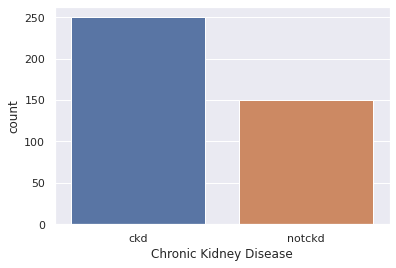

In [5]:
sns.countplot(x = y_data)

We balance the target class:

In [6]:
from imblearn.over_sampling import ADASYN
from collections import Counter
oversampler = ADASYN()
X_data, Y_data = oversampler.fit_resample(x_data, y_data)
Counter(Y_data)

Counter({'ckd': 250, 'notckd': 229})

In [7]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler
robustscaler = RobustScaler()
robustscaler.fit(X_data)
X_scaled = robustscaler.transform(X_data)
Scaled_Data = pd.DataFrame(X_scaled, columns = X_data.columns)
Scaled_Data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cells,Red Blood Cells Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,-0.227273,0.077055,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.209587,...,0.342105,0.331356,-0.552347,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
1,-2.090909,-2.922945,0.000000,4.0,0.0,0.0,0.0,0.0,0.0,-0.354516,...,-0.736842,-0.331356,-1.173737,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.409091,0.077055,-1.613455,2.0,3.0,0.0,0.0,0.0,0.0,7.953176,...,-1.184211,-1.104519,-0.655912,0.000000,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.227273,-0.922945,-2.420182,4.0,0.0,0.0,-1.0,1.0,0.0,0.107023,...,-0.763158,-0.994067,-0.932086,-2.155639,1.0,0.0,0.0,1.0,1.0,1.0
4,-0.090909,0.077055,-1.613455,2.0,0.0,0.0,0.0,0.0,0.0,-0.175029,...,-0.657895,-0.662711,-0.724955,-0.994910,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
minmaxscaler = MinMaxScaler()
minmaxscaler.fit(Scaled_Data)
X_Scaled = minmaxscaler.transform(Scaled_Data)
Scaled_data = pd.DataFrame(X_Scaled, columns = Scaled_Data.columns)
Scaled_data.head()

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random,...,Hemoglobin,Packed Cell Volume,White Blood Cells,Red Blood Cells Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.836735,0.777778,0.231405,0.525424,1.0,1.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.164530,...,0.557823,0.644444,0.157025,0.525424,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.442177,0.488889,0.219008,0.525424,0.0,1.0,0.0,1.0,0.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.551020,0.511111,0.185950,0.305085,1.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.578231,0.577778,0.210744,0.423729,0.0,0.0,0.0,0.0,0.0,0.0


## Principal Component Analysis

### Scree Plot - Robust Scaler

In [9]:
from sklearn.decomposition import PCA
pca_robust = PCA()
pca_robust.fit(Scaled_Data)
pca_robust.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

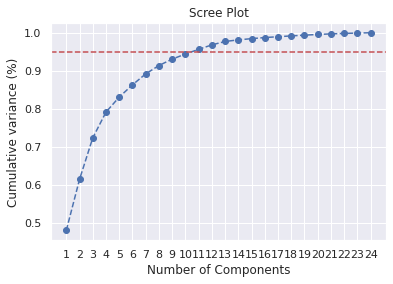

In [10]:
fig, ax = plt.subplots()
xi = np.arange(1, len(Scaled_Data.columns)+1, 1)
yi = np.cumsum(pca_robust.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

We require 11 components to explain 95% of the variance.

### Scree Plot - MinMax Scaler + Robust Scaler

In [11]:
pca_minmax = PCA()
pca_minmax.fit(Scaled_data)
pca_minmax.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': None,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

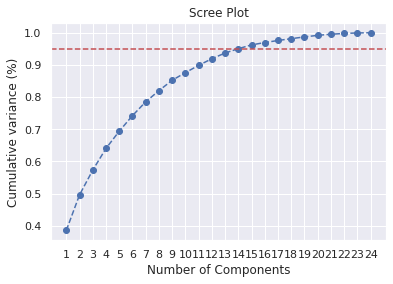

In [12]:
fig, ax = plt.subplots()
xi = np.arange(1, len(Scaled_data.columns)+1, 1)
yi = np.cumsum(pca_minmax.explained_variance_ratio_)

plt.plot(xi, yi, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('Scree Plot')
plt.axhline(y = 0.95, color='r', linestyle='--')
ax.grid("both")
plt.show()

We need 15 components to explain 95% of the variance when we use MinMax Scaler on top of the Robust Scaler.

### PCA - Robust Scaler

In [13]:
pca_robust = PCA(n_components=0.95, random_state = 42)
pca_robust.fit(Scaled_Data)
X_PCA = pca_robust.transform(Scaled_Data)
print('Shape of X before PCA: ', Scaled_Data.shape)
print('Shape of X after PCA: ', X_PCA.shape)

Shape of X before PCA:  (479, 24)
Shape of X after PCA:  (479, 11)


In [14]:
columns_PCA = ['PCA Compponent %i' %i for i in range(1, 12)]
PCA_Data = pd.DataFrame(pca_robust.transform(X_data), columns = columns_PCA)
PCA_Data.head()

,PCA Compponent 1,PCA Compponent 2,PCA Compponent 3,PCA Compponent 4,PCA Compponent 5,PCA Compponent 6,PCA Compponent 7,PCA Compponent 8,PCA Compponent 9,PCA Compponent 10,PCA Compponent 11
0,92.612130,-759.703597,-468.205714,-207.540402,-261.716923,311.922436,1732.970831,4953.227073,4522.103712,2407.820400,127.275232
1,60.449591,-581.424849,-354.105856,-149.777523,-211.032797,238.357861,1333.516221,3828.319363,3452.770932,1877.056216,96.474819
2,120.677057,-930.407666,-516.181806,-22.868818,-274.644754,232.920545,1617.865639,4739.231619,4344.550395,2357.358901,39.536363
3,92.715356,-668.485280,-403.108499,-182.936318,-229.573694,250.218074,1489.212560,4247.167395,3889.994381,2066.706536,106.803751
4,83.836784,-708.183597,-436.680200,-197.995967,-237.612450,296.071599,1622.655557,4644.437425,4229.363023,2247.233342,115.130833


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y_data)

In [16]:
X = PCA_Data.values
Y = Y_encoded

## Split into Test and Train Sets

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size = 0.2)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('Y_train shape: ', Y_train.shape)
print('Y_test shape: ', Y_test.shape)

X_train shape:  (383, 11)
X_test shape:  (96, 11)
Y_train shape:  (383,)
Y_test shape:  (96,)


## ML Techniques - Balanced Target class

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_curve, roc_auc_score

### k-Neighbours Classifier

We can quickly tweak the n_neighbors to prevent overfitting.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
kNN_classifier_balanced = KNeighborsClassifier(n_neighbors = 5)
kNN_classifier_balanced.fit(X_train, Y_train)
kNN_classifier_balanced.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [20]:
y_pred_kNN_balanced = kNN_classifier_balanced.predict(X_test)
y_pred_kNN_train_balanced = kNN_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_kNN_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_kNN_balanced))

Accuracy of the training set:  0.8276762402088773
Accuracy of the testing set:  0.78125


              precision    recall  f1-score   support

           0       0.94      0.61      0.74        49
           1       0.70      0.96      0.81        47

    accuracy                           0.78        96
   macro avg       0.82      0.78      0.78        96
weighted avg       0.82      0.78      0.78        96



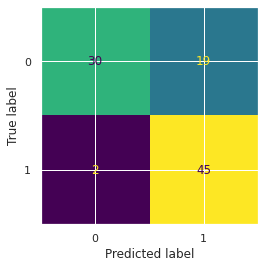

In [21]:
print(classification_report(Y_test, y_pred_kNN_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_kNN_balanced, colorbar=False)

### Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
NB_classifier_balanced = GaussianNB()
NB_classifier_balanced.fit(X_train, Y_train)
NB_classifier_balanced.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [23]:
y_pred_NB_balanced = NB_classifier_balanced.predict(X_test)
y_pred_NB_train_balanced = NB_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_NB_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_NB_balanced))

Accuracy of the training set:  0.7154046997389034
Accuracy of the testing set:  0.75


              precision    recall  f1-score   support

           0       0.78      0.71      0.74        49
           1       0.73      0.79      0.76        47

    accuracy                           0.75        96
   macro avg       0.75      0.75      0.75        96
weighted avg       0.75      0.75      0.75        96



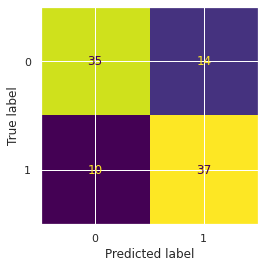

In [24]:
print(classification_report(Y_test, y_pred_NB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_NB_balanced, colorbar=False)

### Support Vector Machine

In [25]:
from sklearn.svm import SVC
SVM_classifier_balanced = SVC(random_state = 42, C = 0.01)
SVM_classifier_balanced.fit(X_train, Y_train)
y_pred_SVM_balanced = SVM_classifier_balanced.predict(X_test)
SVM_classifier_balanced.get_params()

{'C': 0.01,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [26]:
y_pred_SVM_train_balanced = SVM_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_SVM_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_SVM_balanced))

Accuracy of the training set:  0.5248041775456919
Accuracy of the testing set:  0.5104166666666666


In [27]:
print(classification_report(Y_test, y_pred_SVM_balanced, labels = np.unique(y_pred_SVM_balanced)))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68        49

   micro avg       0.51      1.00      0.68        49
   macro avg       0.51      1.00      0.68        49
weighted avg       0.51      1.00      0.68        49



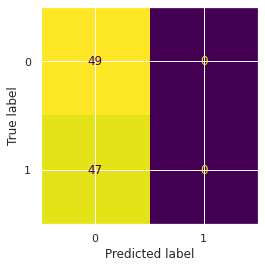

In [28]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_SVM_balanced, colorbar=False)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
LR_classifier_balanced = LogisticRegression(random_state = 42, solver = 'liblinear')
LR_classifier_balanced.fit(X_train, Y_train)
LR_classifier_balanced.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [30]:
y_pred_LR_balanced = LR_classifier_balanced.predict(X_test)
y_pred_LR_train_balanced = LR_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_LR_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_LR_balanced))

Accuracy of the training set:  0.9817232375979112
Accuracy of the testing set:  0.9791666666666666


In [31]:
print(classification_report(Y_test, y_pred_LR_balanced))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        49
           1       0.98      0.98      0.98        47

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



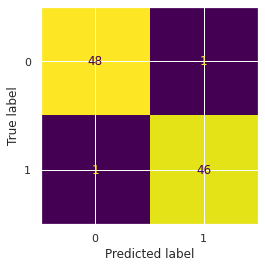

In [32]:
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_LR_balanced, colorbar=False)

### Decision Tree Classifier

We limit the *max_depth* since this is a small dataset, in order to avoid overfitting.

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier_balanced = DecisionTreeClassifier(max_depth = 5)
DT_classifier_balanced.fit(X_train, Y_train)
DT_classifier_balanced.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [34]:
y_pred_DT_balanced = DT_classifier_balanced.predict(X_test)
y_pred_DT_train_balanced = DT_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_DT_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_DT_balanced))

Accuracy of the training set:  0.9242819843342036
Accuracy of the testing set:  0.8541666666666666


              precision    recall  f1-score   support

           0       0.95      0.76      0.84        49
           1       0.79      0.96      0.87        47

    accuracy                           0.85        96
   macro avg       0.87      0.86      0.85        96
weighted avg       0.87      0.85      0.85        96



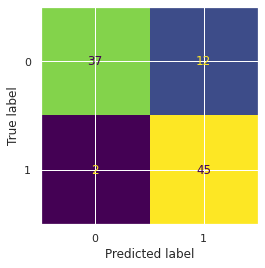

In [35]:
print(classification_report(Y_test, y_pred_DT_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_DT_balanced, colorbar=False)

### Random Forest Classifier

We limit the max_depth since this is a small dataset, in order to control overfitting - we still need to fine-tune the hyperparameters in order to prevent overfitting.

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier_balanced = RandomForestClassifier(max_depth=4)
RF_classifier_balanced.fit(X_train, Y_train)
RF_classifier_balanced.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [37]:
y_pred_RF_balanced = RF_classifier_balanced.predict(X_test)
y_pred_RF_train_balanced = RF_classifier_balanced.predict(X_train)
print('Accuracy of the training set: ', accuracy_score(Y_train, y_pred_RF_train_balanced))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_RF_balanced))

Accuracy of the training set:  0.8903394255874674
Accuracy of the testing set:  0.84375


              precision    recall  f1-score   support

           0       0.97      0.71      0.82        49
           1       0.77      0.98      0.86        47

    accuracy                           0.84        96
   macro avg       0.87      0.85      0.84        96
weighted avg       0.87      0.84      0.84        96



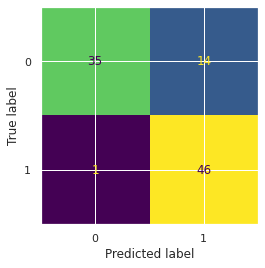

In [38]:
print(classification_report(Y_test, y_pred_RF_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_RF_balanced, colorbar=False)

### AdaBoost Classifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_balanced = AdaBoostClassifier(random_state = 42, base_estimator = RandomForestClassifier(max_depth = 7))
adaboost_balanced.fit(X_train, Y_train)
adaboost_balanced.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__bootstrap': True,
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 7,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__max_samples': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 100,
 'base_estimator__n_jobs': None,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': RandomForestClassifier(max_depth=7),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': 42}

In [40]:
y_pred_Adaboost_balanced = adaboost_balanced.predict(X_test)
print('Accuracy of the training set: ', adaboost_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_Adaboost_balanced))

Accuracy of the training set:  0.97911227154047
Accuracy of the testing set:  0.8645833333333334


              precision    recall  f1-score   support

           0       0.97      0.76      0.85        49
           1       0.79      0.98      0.88        47

    accuracy                           0.86        96
   macro avg       0.88      0.87      0.86        96
weighted avg       0.89      0.86      0.86        96



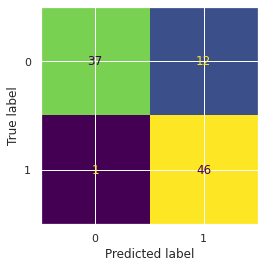

In [41]:
print(classification_report(Y_test, y_pred_Adaboost_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_Adaboost_balanced, colorbar=False)

### XGBoost Classifier

We limit the n_estimators and the learning_rate.

In [42]:
from xgboost import XGBClassifier
xgb_classifier_balanced = XGBClassifier(random_state = 42, n_estimators = 50)
xgb_classifier_balanced.fit(X_train, Y_train)
xgb_classifier_balanced.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 50,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [43]:
y_pred_XGB_balanced = xgb_classifier_balanced.predict(X_test)
print('Accuracy of the training set: ', xgb_classifier_balanced.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_XGB_balanced))

Accuracy of the training set:  0.9503916449086162
Accuracy of the testing set:  0.8854166666666666


              precision    recall  f1-score   support

           0       0.97      0.80      0.88        49
           1       0.82      0.98      0.89        47

    accuracy                           0.89        96
   macro avg       0.90      0.89      0.88        96
weighted avg       0.90      0.89      0.88        96



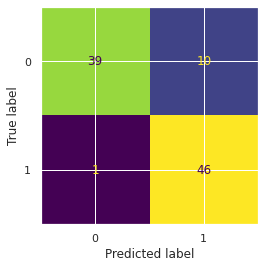

In [44]:
print(classification_report(Y_test, y_pred_XGB_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_XGB_balanced, colorbar=False)

### Voting Classifier

In [45]:
from sklearn.ensemble import VotingClassifier

VC = VotingClassifier(estimators = [('kNN', kNN_classifier_balanced), ('NB', NB_classifier_balanced), ('SVM', SVM_classifier_balanced),
                                    ('LR', LR_classifier_balanced), ('DT', DT_classifier_balanced), ('RF', RF_classifier_balanced), 
                                    ('Adaboost', adaboost_balanced), ('XGB', xgb_classifier_balanced)], voting = 'hard')
VC.fit(X_train, Y_train)
VC.get_params()

{'estimators': [('kNN', KNeighborsClassifier()),
  ('NB', GaussianNB()),
  ('SVM', SVC(C=0.01, random_state=42)),
  ('LR', LogisticRegression(random_state=42, solver='liblinear')),
  ('DT', DecisionTreeClassifier(max_depth=5)),
  ('RF', RandomForestClassifier(max_depth=4)),
  ('Adaboost',
   AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=7),
                      random_state=42)),
  ('XGB', XGBClassifier(n_estimators=50, random_state=42))],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'kNN': KNeighborsClassifier(),
 'NB': GaussianNB(),
 'SVM': SVC(C=0.01, random_state=42),
 'LR': LogisticRegression(random_state=42, solver='liblinear'),
 'DT': DecisionTreeClassifier(max_depth=5),
 'RF': RandomForestClassifier(max_depth=4),
 'Adaboost': AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=7),
                    random_state=42),
 'XGB': XGBClassifier(n_estimators=50, random_state=42),
 'kNN__algo

In [46]:
y_pred_VC_balanced = VC.predict(X_test)
print('Accuracy of the training set: ', VC.score(X_train, Y_train))
print('Accuracy of the testing set: ', accuracy_score(Y_test, y_pred_VC_balanced))

Accuracy of the training set:  0.9660574412532638
Accuracy of the testing set:  0.8645833333333334


              precision    recall  f1-score   support

           0       0.97      0.76      0.85        49
           1       0.79      0.98      0.88        47

    accuracy                           0.86        96
   macro avg       0.88      0.87      0.86        96
weighted avg       0.89      0.86      0.86        96



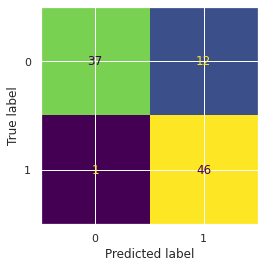

In [47]:
print(classification_report(Y_test, y_pred_VC_balanced))
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred_VC_balanced, colorbar=False)

### Accuracy

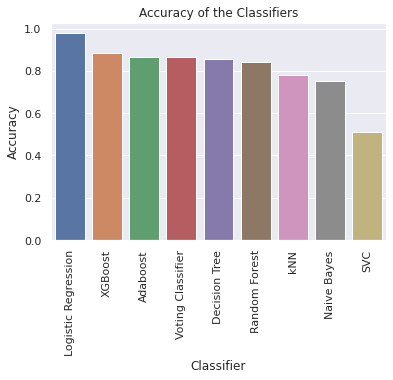

In [48]:
accuracy_df = pd.DataFrame()
accuracy_df['Classifier'] = ['Decision Tree', 'kNN', 'Naive Bayes', 'SVC', 'Logistic Regression', 'Random Forest', 'Adaboost', 
                             'XGBoost', 'Voting Classifier']
accuracy_df['Accuracy'] = [accuracy_score(Y_test, y_pred_DT_balanced), accuracy_score(Y_test, y_pred_kNN_balanced), 
                           accuracy_score(Y_test, y_pred_NB_balanced), accuracy_score(Y_test, y_pred_SVM_balanced), 
                           accuracy_score(Y_test, y_pred_LR_balanced), accuracy_score(Y_test, y_pred_RF_balanced),
                           accuracy_score(Y_test, y_pred_Adaboost_balanced), accuracy_score(Y_test, y_pred_XGB_balanced), 
                           accuracy_score(Y_test, y_pred_VC_balanced)]

sns.barplot(y = 'Accuracy', x = 'Classifier', data = accuracy_df, order = accuracy_df.sort_values('Accuracy', ascending = False).Classifier)
plt.title('Accuracy of the Classifiers')
plt.xticks(rotation=90)
plt.show()

XGBoost, Voting Classifier and Adaboost Classifier produces considerably good accuracy of the algorithms implemented upon balancing the target class. It must however be noted that Logistic Regression Classifier has to be used with caution, since its training accuracy is less than the testing accuracy, which may be due to the underlying distribution. Thus, it is recommended to test the Logistic Regression Classifier with a new Test data, to better evaluate its performance.

### ROC Curve

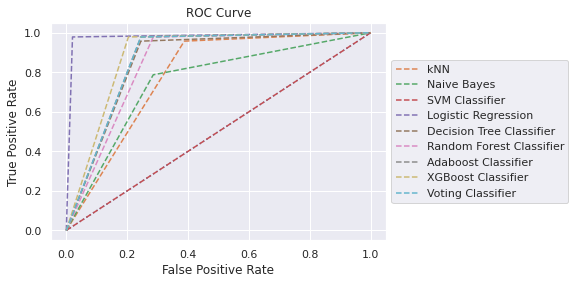

In [49]:
plt.plot([0,1], [0,1], ':')
fpr1, tpr1, thresholds = roc_curve(Y_test, y_pred_kNN_balanced)
plt.plot(fpr1, tpr1, '--', label='kNN')
fpr2, tpr2, thresholds = roc_curve(Y_test, y_pred_NB_balanced)
plt.plot(fpr2, tpr2, '--', label='Naive Bayes')
fpr3, tpr3, thresholds = roc_curve(Y_test, y_pred_SVM_balanced)
plt.plot(fpr3, tpr3, '--', label='SVM Classifier')
fpr4, tpr4, thresholds = roc_curve(Y_test, y_pred_LR_balanced)
plt.plot(fpr4, tpr4, '--', label='Logistic Regression')
fpr5, tpr5, thresholds = roc_curve(Y_test, y_pred_DT_balanced)
plt.plot(fpr5, tpr5, '--', label='Decision Tree Classifier')
fpr6, tpr6, thresholds = roc_curve(Y_test, y_pred_RF_balanced)
plt.plot(fpr6, tpr6, '--', label='Random Forest Classifier')
fpr7, tpr7, thresholds = roc_curve(Y_test, y_pred_Adaboost_balanced)
plt.plot(fpr7, tpr7, '--', label='Adaboost Classifier')
fpr8, tpr8, thresholds = roc_curve(Y_test, y_pred_XGB_balanced)
plt.plot(fpr8, tpr8, '--', label='XGBoost Classifier')
fpr9, tpr9, thresholds = roc_curve(Y_test, y_pred_VC_balanced)
plt.plot(fpr9, tpr9, '--', label='Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(bbox_to_anchor = (1.0, 0.5), loc = 'center left')
plt.show()

Voting Classifier and XGBoost Classifier performs considerably well, in comparison to other algorithms. The ROC Curve of Logistic Regression is perfect, however, the classifier must be used with caution.

## Conclusion

Upon balancing the target class, XGBoost Classifier works best among the classifiers we have implemented. However, it is still not a perfect classifier. Noteworthy is the performance of the Logistic Regression Classifier. However, it has to be investigated further for to analyze whether the model overfits the data or if it was purely chance.


When it concerns healthcare, especially in the case of Chronic disease and conditions, it is much better to be wary of the consequences of our model - whether it overfits or underfits - they must be thoroughly examined and their limits and biases studied before their deployment.